# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [2]:
# WRITE YOUR CODE HERE
install.packages("glmnet")
library(glmnet)
library(tidyverse)
library(ggplot2)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-7

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()



We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [3]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)


(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [4]:
# WRITE YOUR CODE HERE
library(tidyverse)
train <- data.frame(x = sample(x, 50), y = sample(y, 50))
test <- data.frame(x = sample(x, 51), y = sample(y, 51))
head(train)
head(test)


,x,y
,<dbl>,<dbl>
1,-7.56,0.5534833
2,5.58,0.4865172
3,1.80,-0.5995247
4,-0.54,1.8189451
5,-1.44,1.7621994
6,-4.86,1.1078956


,x,y
,<dbl>,<dbl>
1,1.80,1.5256458
2,1.08,1.0809010
3,0.36,0.4156406
4,-7.38,0.4865172
5,-0.72,1.5889089
6,-5.22,0.6489726


(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

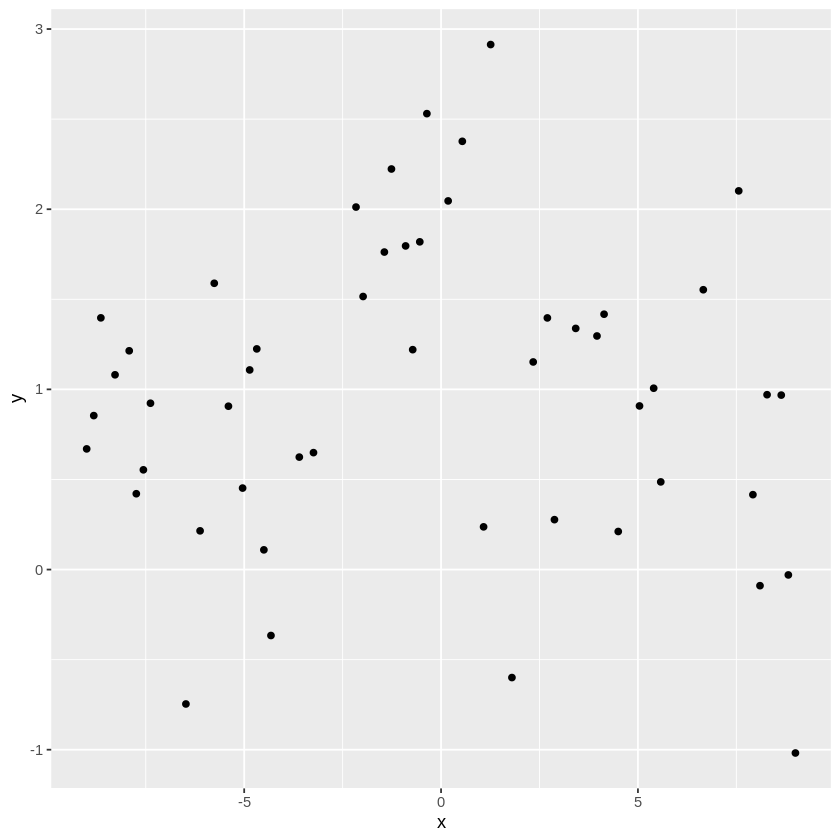

In [5]:
# WRITE YOUR CODE HERE
ggplot(train, aes(x=x, y=y)) +
  geom_point()


How would you describe the relationship between $x$ and $y$ based on this plot?

> Based on this plot, I would be inclined to say that there's no relationship between x and y because I do not see any trends when visually inspecting the graph.
> 

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


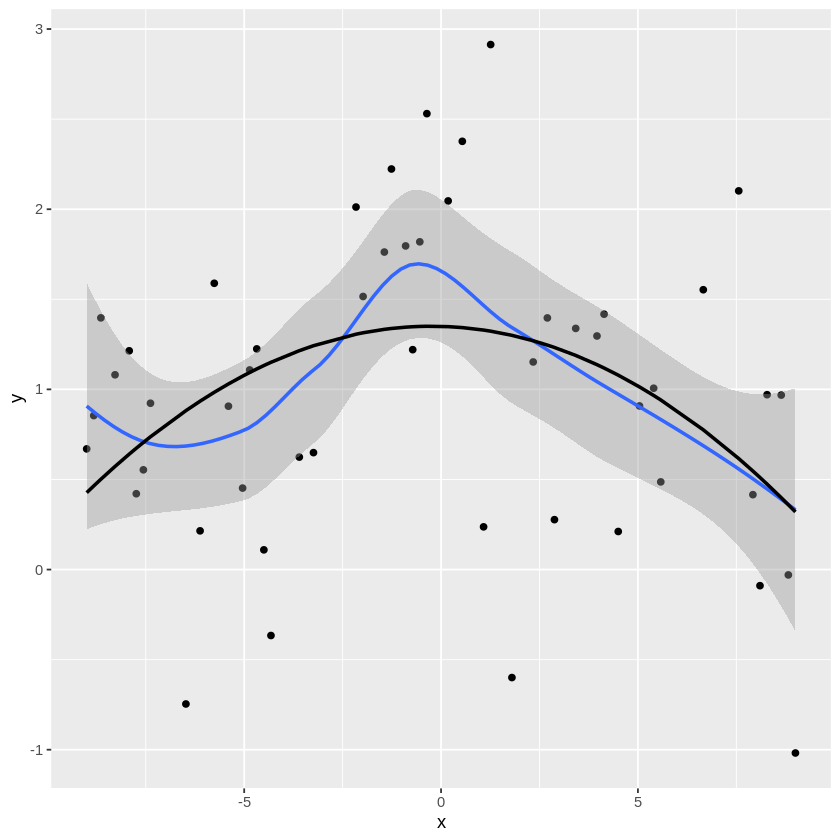

In [6]:
# WRITE YOUR CODE HERE
model <- lm(y ~ poly(x,2), data = train)
train$predlm = predict(model)

ggplot(train, aes(x=x, y=y)) +
  geom_point() +
  stat_smooth() +
  geom_line(aes(y = predlm), size = 1)


How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> It seems that the 2nd degree polynomial does not fit the data as well as it could, since the stat_smooth() line has a shape more similar to a sine graph.
> 

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


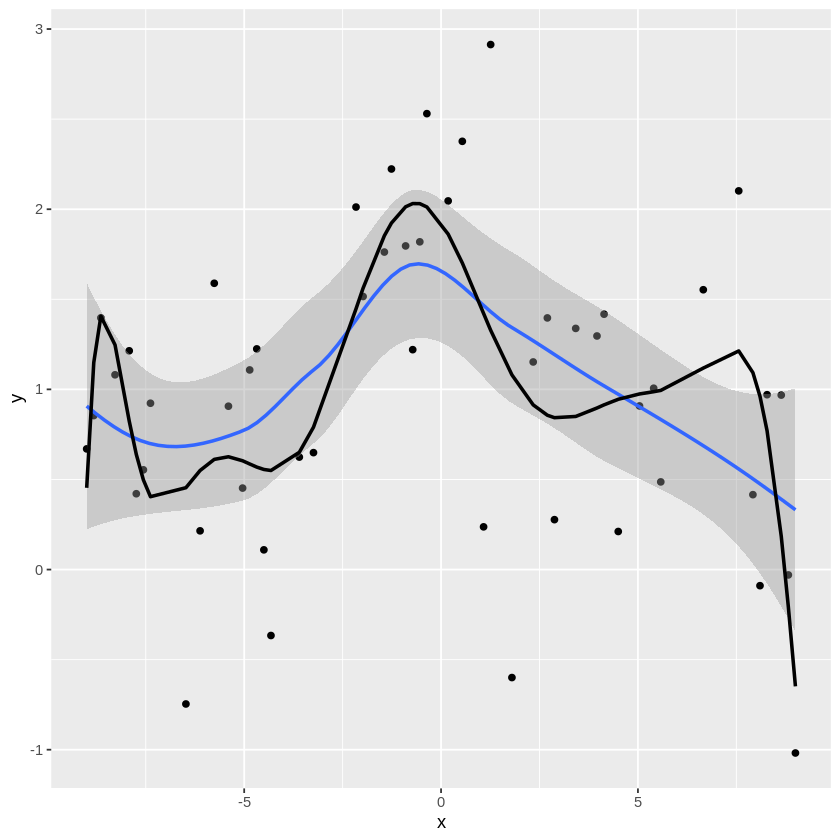

In [7]:
# WRITE YOUR CODE HERE
model <- lm(y ~ poly(x,12), data = train)
train$predlm = predict(model)

ggplot(train, aes(x=x, y=y)) +
  geom_point() +
  stat_smooth() +
  geom_line(aes(y = predlm), size = 1)

> I would say that the 12th degree polynomial fit is better than the 2nd degree polynomial fit -- however, this model seems to be overfit to the data and therefore would likely perform poorly on the testing data.
> 

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

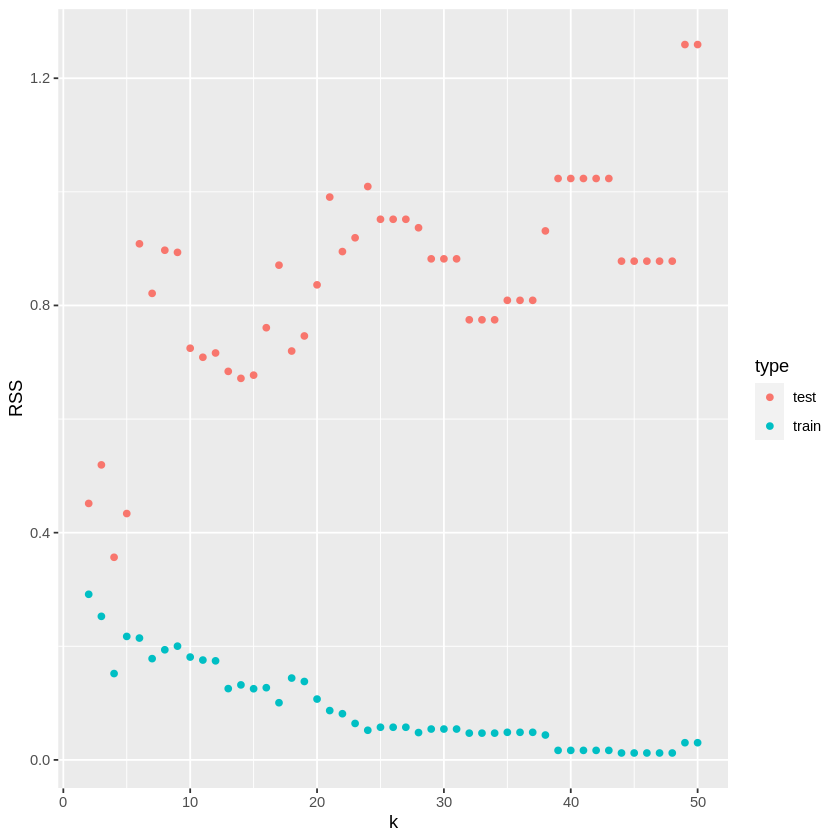

In [8]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)


for (k in degree) {

    model <- lm(y ~ poly(x,k, raw = TRUE), data = train)

    train_pred <- data.frame(predict(model))
    suppressWarnings(test_pred <- data.frame(predict(model, newdata = test)))

    data_train <- data.frame(pred = train_pred[,1], actual = train$y)
    data_test <- data.frame(pred = test_pred[,1], actual = test$y)

    train_rss[k] <- median((data_train$actual - data_train$pred)^2)
    test_rss[k] <- median((data_test$actual - data_test$pred)^2)
    
}

# Plot your results here
#2 factor polynomials have NA for median rss
train_rss <- data.frame(train_rss) %>%
  drop_na()
test_rss <- data.frame(test_rss) %>%
  drop_na()
combined <- data.frame(matrix(nrow = length(degree) * 2, ncol = 3))
colnames(combined) <- c("k", "RSS", "type")
combined[1:49,1] <- degree
combined[50:98,1] <- degree
combined[1:49,2] <- train_rss
combined[1:49,3] <- "train"
combined[50:98,2] <- test_rss
combined[50:98,3] <- "test"

ggplot(combined, aes(x = k, y = RSS, color = type)) +
  geom_point()


What do you see as $k$ increase?

> As k increases, the training error decreases while the testing error dramatically increases.
> 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



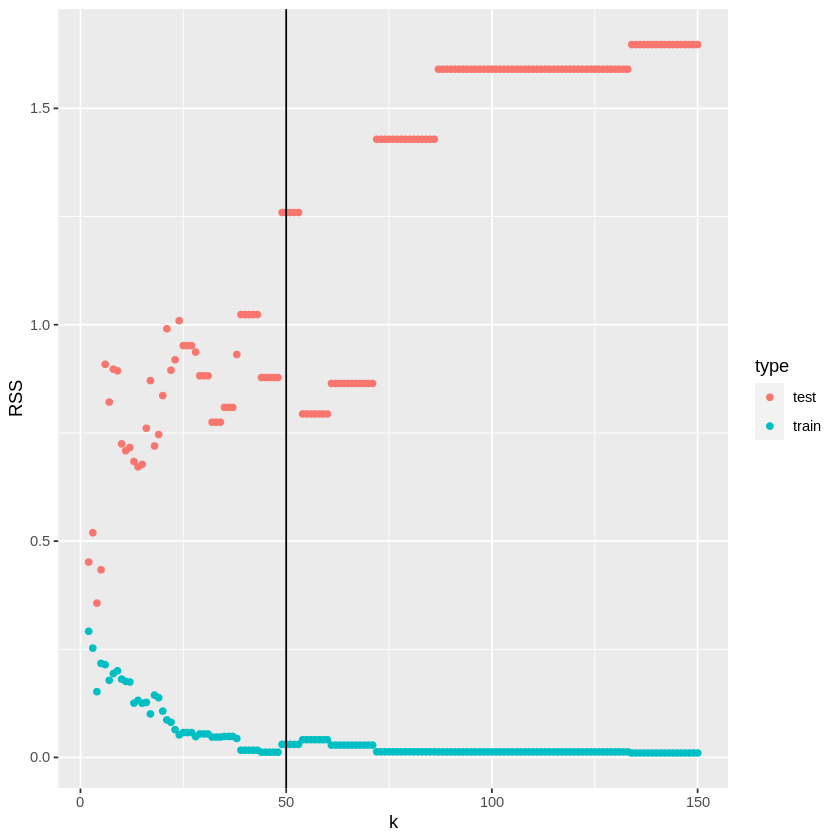

In [9]:
# WRITE YOUR CODE HERE
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)


for (k in degree) {

    model <- lm(y ~ poly(x,k, raw = TRUE), data = train)

    train_pred <- data.frame(predict(model))
    suppressWarnings(test_pred <- data.frame(predict(model, newdata = test)))

    data_train <- data.frame(pred = train_pred[,1], actual = train$y)
    data_test <- data.frame(pred = test_pred[,1], actual = test$y)

    train_rss[k] <- median((data_train$actual - data_train$pred)^2)
    test_rss[k] <- median((data_test$actual - data_test$pred)^2)
    
}

# Plot your results here
#2 factor polynomials have NA for median rss
train_rss <- data.frame(train_rss) %>%
  drop_na()
test_rss <- data.frame(test_rss) %>%
  drop_na()
combined <- data.frame(matrix(nrow = length(degree) * 2, ncol = 3))
colnames(combined) <- c("k", "RSS", "type")
combined[1:149,1] <- degree
combined[150:298,1] <- degree
combined[1:149,2] <- train_rss
combined[1:149,3] <- "train"
combined[150:298,2] <- test_rss
combined[150:298,3] <- "test"

ggplot(combined, aes(x = k, y = RSS, color = type)) +
  geom_point() +
  geom_vline(xintercept = 50)



What do you see as $k$ gets larger than $n$?

> As k gets larger than n, the training RSS values level out and are essentially the same as k continues to increase, while the testing RSS values continue to increase as k gets larger.
> 

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

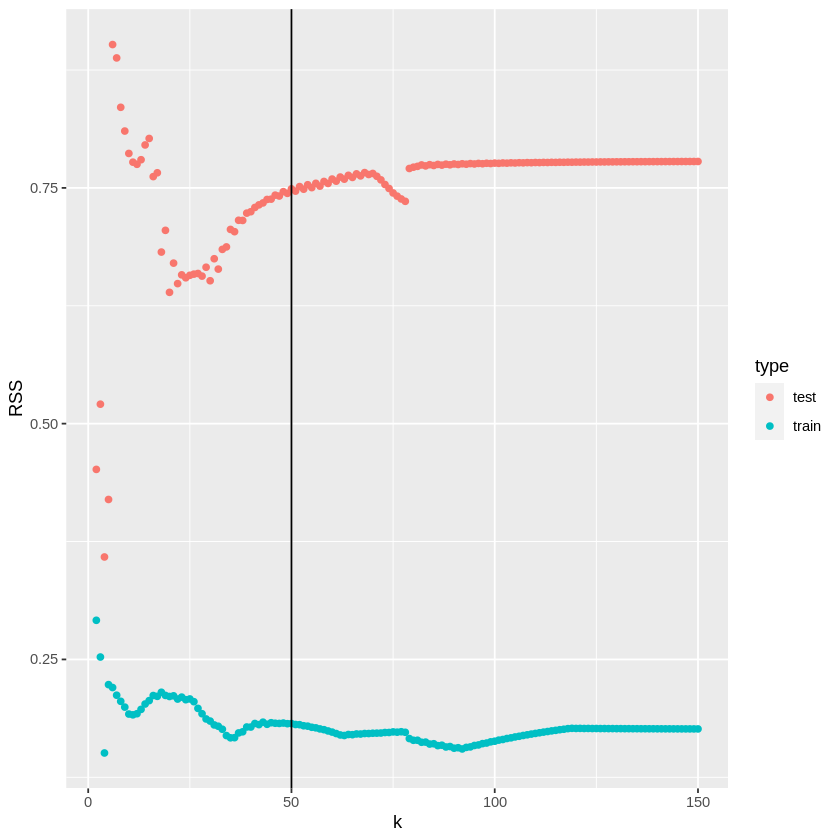

In [44]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

newx <- matrix(data = train, ncol = 2)

for (k in degree) {
    # WRITE YOUR CODE HERE
    x = model.matrix(y ~ poly(x,k,raw = TRUE), data = train)[,-1]
    y = train$y

    x_test = model.matrix(y~poly(x,k,raw = TRUE), test)[,-1]

    ridge.mod = glmnet(x, y, alpha=0, lambda = lambda)

    train_pred <- data.frame(predict(ridge.mod, newx = x))
    test_pred <- data.frame(predict(ridge.mod, newx = x_test))

    data_train <- data.frame(pred = train_pred[,1], actual = train$y)
    data_test <- data.frame(pred = test_pred[,1], actual = test$y)

    train_rss[k] <- median((data_train$actual - data_train$pred)^2)
    test_rss[k] <- median((data_test$actual - data_test$pred)^2)
    
}

# Plot your results here
train_rss <- data.frame(train_rss) %>%
  drop_na()
test_rss <- data.frame(test_rss) %>%
  drop_na()
combined <- data.frame(matrix(nrow = length(degree) * 2, ncol = 3))
colnames(combined) <- c("k", "RSS", "type")
combined[1:149,1] <- degree
combined[150:298,1] <- degree
combined[1:149,2] <- train_rss
combined[1:149,3] <- "train"
combined[150:298,2] <- test_rss
combined[150:298,3] <- "test"

ggplot(combined, aes(x = k, y = RSS, color = type)) +
  geom_point() +
  geom_vline(xintercept = 50)



What happens now when $k$ gets larger than $n$?

> Now, both the training and testing RSS values level out as k gets larger than n.
> 

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> The behavior of the bias-variance tradeoff changes when a sparsity constraint is applied because the weaker predictor variables in the model are penalized, causing the higher degree polynomials to stop driving up the test error of the model as k gets larger than n because their effects are weak.
> 

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> Regularization works around the upper limit of unique solutions to Y = F(X) by adding a shrinkage penalty to the minimized residual squared error based on a chosen sparsity parameter, making it a unique solution.
> 

**DUE:** 5pm EST, April 12, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*